# K-Nearest-Neighbors

## Include Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Input

In [ ]:
K = 5 # Number of Samples selected to define the Class of the Inference Sample

In [ ]:
N = 10  # Number of Samples per Class
C = 3   # Number of Classes
D = 2   # Numer of Dimensions

In [ ]:
def get_samples():
    c1 = np.random.uniform(low=0.0, high=0.2, size=(N,D))
    c1 = np.concatenate((c1, np.full((N,1), 0)), axis=1) # Add class to samples
    c2 = np.random.uniform(low=0.4, high=0.6, size=(N,D))
    c2 = np.concatenate((c2, np.full((N,1), 1)), axis=1) # Add class to samples
    c3 = np.random.uniform(low=0.8, high=1.0, size=(N,D))
    c3 = np.concatenate((c3, np.full((N,1), 2)), axis=1) # Add class to samples
    samples = np.concatenate((c1, c2, c3))
    return samples

## Ploting

In [ ]:
def plot_samples(samples, classes, inference_sample, inference_sample_class, num_classes):
    plt.title("K-Nearest-Neighbors")
    c_inference_sample = None
    for i in range(num_classes):
        c = next(plt.gca()._get_lines.prop_cycler)['color']
        class_indices = (classes == i).nonzero()
        class_samples = samples[class_indices]
        plt.scatter(class_samples[:,0], class_samples[:,1], c=c, 
                    label="Class {:02d}".format(i))
        if inference_sample_class == i:
          c_inference_sample = c
    plt.scatter(inference_sample[:,0], inference_sample[:,1], c=c_inference_sample, 
                marker="X", label="Inference Sample")
    plt.legend()
    plt.show()
    plt.clf()

## Assignment

In [ ]:
def get_distances(class_samples, sample):
  # Calculate Euclidian Distance between all class samples and the inference sample
  distances = np.sqrt(np.square(class_samples[:,0] - sample[:,0]) + 
                      np.square(class_samples[:,1] - sample[:,1]))
  return distances

In [ ]:
# Generate random inference samples
inference_samples = np.random.rand(5,1,D)

In [ ]:
# Generate random class samples from M classes
samples = get_samples()
class_samples, classes = samples[:,:-1], samples[:,-1]

Inference Sample is from Class 02:


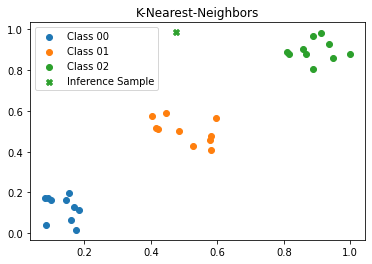

Inference Time: 4.667044ms
Inference Sample is from Class 02:


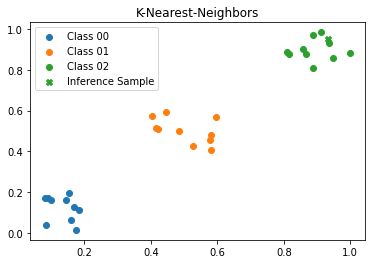

Inference Time: 0.113249ms
Inference Sample is from Class 01:


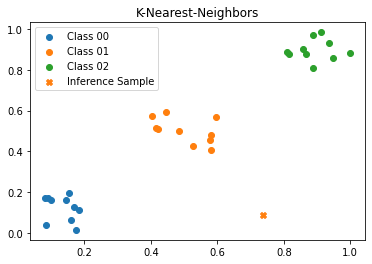

Inference Time: 0.114202ms
Inference Sample is from Class 01:


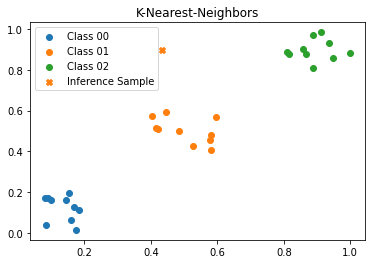

Inference Time: 0.097513ms
Inference Sample is from Class 02:


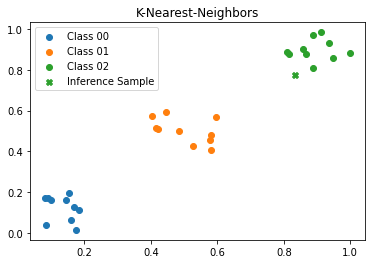

Inference Time: 0.110388ms


<Figure size 432x288 with 0 Axes>

In [ ]:
inference_times = []
for inference_sample in inference_samples:
  st = time.time()
  # Get Distances of inference sample to all class samples
  distances = get_distances(class_samples, inference_sample)
  # Get K nearest neighbors
  nearest_neighbors = classes[np.argsort(distances)[:K]].astype(int)
  # Get most frequent class
  inference_sample_class = np.bincount(nearest_neighbors).argmax()
  et = time.time()
  print("Inference Sample is from Class {:02d}:".format(inference_sample_class))
  plot_samples(class_samples, classes, inference_sample, inference_sample_class, C)
  inference_time = (et-st)*1000 # Convert s in ms
  print("Inference Time: {:f}ms".format(inference_time))
  inference_times.append(inference_time)
inference_times = np.array(inference_times)

## Using Scikit-Learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=K)

In [ ]:
model.fit(class_samples,classes)

KNeighborsClassifier()

Inference Sample is from Class 02:


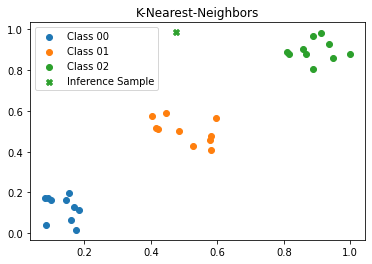

Inference Time: 0.002398ms
Inference Sample is from Class 02:


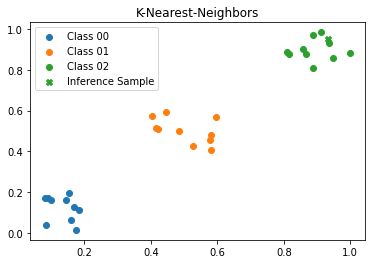

Inference Time: 0.001391ms
Inference Sample is from Class 01:


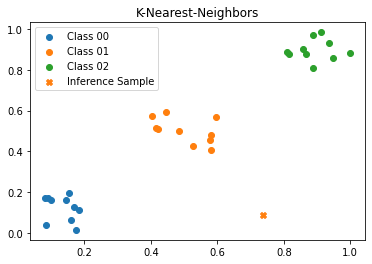

Inference Time: 0.005388ms
Inference Sample is from Class 01:


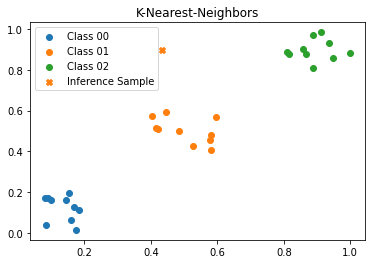

Inference Time: 0.001523ms
Inference Sample is from Class 02:


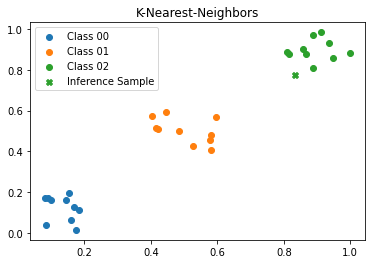

Inference Time: 0.001866ms


<Figure size 432x288 with 0 Axes>

In [ ]:
scl_inference_times = []
for inference_sample in inference_samples:
  st = time.time()
  inference_sample_class = model.predict(inference_sample)
  et = time.time()
  inference_sample_class = inference_sample_class.astype(int)[0]
  print("Inference Sample is from Class {:02d}:".format(inference_sample_class))
  plot_samples(class_samples, classes, inference_sample, inference_sample_class, C)
  inference_time = (et-st)*1000 # Convert s in ms
  print("Inference Time: {:f}ms".format(et-st))
  scl_inference_times.append(inference_time)
scl_inference_times = np.array(scl_inference_times)

## Inference Time Comparision

In [ ]:
print("{:<22} {:f}ms\u00B1{:f}ms".format('Custom Implementation:', inference_times.mean(), inference_times.std()))
print("{:<22} {:f}ms\u00B1{:f}ms".format('Scikit-Learn:', scl_inference_times.mean(), scl_inference_times.std()))

Custom Implementation: 1.020479ms±1.823292ms
Scikit-Learn:          2.513313ms±1.478926ms
